# News Mood
- In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

- Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

The first plot will be and/or feature the following:

- Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
- Each plot point will reflect the compound sentiment of a tweet.
- Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

- Pull last 100 tweets from each outlet.
- Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
- Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
- Export the data in the DataFrame into a CSV file.
- Save PNG images for each plot.
As final considerations:

Use the Matplotlib and Seaborn libraries.
- Include a written description of three observable trends based on the data.
- Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
- Include an exported markdown version of your Notebook called  README.md in your GitHub repository.

In [2]:
# Dependencies
import tweepy
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(os.environ['consumer_key'], os.environ['consumer_secret'])
auth.set_access_token(os.environ['access_token'], os.environ['access_token_secret'])
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
os.environ['access_token']

'969394233080627200-ifMdn3ZOYNawHe1dCRFOm5FkhkFZ9HT'

In [130]:
# Target Account
target_user = ("@BBCWorld","@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Variables for holding sentiments
sentiments = []
oldest_tweet = None

# Loop through all target users
for target in target_user:
    # Counter
    counter = 1
# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        
    # Get all tweets from home feed
        public_tweets = api.user_timeline(target, 
                                          count=20,
                                         max_id=oldest_tweet)
        
    # Loop through all tweets 
        for tweet in public_tweets:
            
        # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            
            
        # Add sentiments for each tweet into an array
            sentiments.append({"User": tweet["user"]["screen_name"],
                               "Date": tweet["created_at"], 
                               "Text": tweet["text"],
                               "Compound": results["compound"],
                               "Positive": results["pos"],
                               "Negative": results["neu"],
                               "Neutral": results["neg"],
                               "Tweets Ago": counter})
            
            # Add to counter 
            counter = counter + 1  
        oldest_tweet = int(tweet['id_str']) - 1

In [131]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

#sentiments_pd.set_index("User", inplace=True)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,-0.3182,Tue Mar 06 04:28:34 +0000 2018,0.813,0.187,0.000,USS Lexington: Lost WW2 aircraft carrier found...,1,BBCWorld
1,0.5859,Tue Mar 06 02:30:06 +0000 2018,0.853,0.000,0.147,RT @BBCNewsAsia: Who says that beauty only com...,2,BBCWorld
2,0.0000,Tue Mar 06 01:44:14 +0000 2018,1.000,0.000,0.000,RT @BBCNewsAsia: Are you one of the WeChat bil...,3,BBCWorld
3,0.0000,Tue Mar 06 01:40:31 +0000 2018,1.000,0.000,0.000,RT @BBCNewsAsia: North Korea's Kim Jong-un say...,4,BBCWorld
4,0.0000,Tue Mar 06 00:59:31 +0000 2018,1.000,0.000,0.000,WeChat hits one billion monthly users - are yo...,5,BBCWorld


In [132]:
#Media specific Dataframes
bbc_sentiments = sentiments_pd[(sentiments_pd["User"] == "BBCWorld")]
cbs_sentiments = sentiments_pd[(sentiments_pd["User"] == "CBSNews")]
cnn_sentiments = sentiments_pd[(sentiments_pd["User"] == "CNN")]
fox_sentiments = sentiments_pd[(sentiments_pd["User"] == "FoxNews")]
nyt_sentiments = sentiments_pd[(sentiments_pd["User"] == "nytimes")]
nyt_sentiments.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
400,-0.5574,Fri Mar 02 03:02:04 +0000 2018,0.787,0.213,0.000,"Senator Mitch McConnell, the Republican leader...",1,nytimes
401,0.2732,Fri Mar 02 02:56:03 +0000 2018,0.642,0.140,0.219,RT @maggieNYT: Trump is becoming engulfed by t...,2,nytimes
402,-0.7964,Fri Mar 02 02:47:03 +0000 2018,0.649,0.351,0.000,As the White House strains under the same chao...,3,nytimes
403,0.0000,Fri Mar 02 02:32:03 +0000 2018,1.000,0.000,0.000,"The effects of the nor’easter, which could lin...",4,nytimes
404,0.0000,Fri Mar 02 02:17:04 +0000 2018,1.000,0.000,0.000,RT @Neil_Irwin: What you need to know about Pr...,5,nytimes


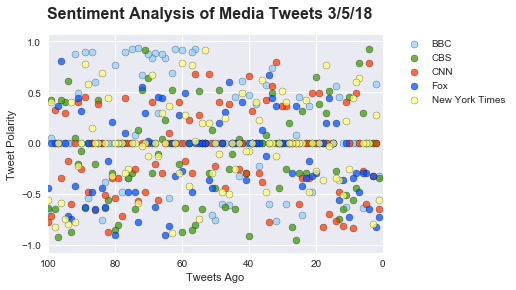

In [183]:
fig, ax = plt.subplots()
sns.set()
fig.suptitle("Sentiment Analysis of Media Tweets 3/5/18", fontsize=16, fontweight="bold")

ax.set_xlim(100, 0)
plt.yticks([-1, -0.5, 0, 0.5, 1])
ax.set_xlabel("Tweets Ago")
ax.set_ylabel("Tweet Polarity")
plt.grid(True)

#Plot BBC
plt.scatter(bbc_sentiments["Tweets Ago"], bbc_sentiments["Compound"], 
                                        marker="o", 
                                        facecolors=sns.xkcd_rgb["light blue"], 
                                        edgecolors="black", 
                                        alpha=0.75, 
                                        label="BBC")
#Plot CBS
plt.scatter(cbs_sentiments["Tweets Ago"], cbs_sentiments["Compound"], 
                                        marker="o", 
                                        facecolors=sns.xkcd_rgb["grass green"], 
                                        edgecolors="black", 
                                        alpha=0.75, 
                                        label="CBS")
#Plot CNN
plt.scatter(cnn_sentiments["Tweets Ago"], cnn_sentiments["Compound"], 
                                        marker="o", 
                                        facecolors=sns.xkcd_rgb["red orange"], 
                                        edgecolors="black", 
                                        alpha=0.75, 
                                        label="CNN")
#Plot Fox
plt.scatter(fox_sentiments["Tweets Ago"], fox_sentiments["Compound"], 
                                        marker="o", 
                                        facecolors=sns.xkcd_rgb["electric blue"], 
                                        edgecolors="black", 
                                        alpha=0.75, 
                                        label="Fox")
#Plot NYT
plt.scatter(nyt_sentiments["Tweets Ago"], nyt_sentiments["Compound"], 
                                        marker="o", 
                                        facecolors=sns.xkcd_rgb["light yellow"], 
                                        edgecolors="black", 
                                        alpha=0.75, 
                                        label="New York Times")

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

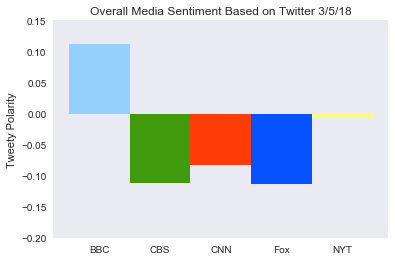

In [185]:
# Store all values
sentiments_comp = (bbc_sentiments["Compound"].mean(), 
                   cbs_sentiments["Compound"].mean(), 
                   cnn_sentiments["Compound"].mean(), 
                   fox_sentiments["Compound"].mean(),
                   nyt_sentiments["Compound"].mean())

# Format data
fig, ax = plt.subplots()
ind = np.arange(len(sentiments_comp))  
width = 1
bbc_bar = ax.bar(ind[0], sentiments_comp[0], width, color=sns.xkcd_rgb["light blue"])
cbs_bar = ax.bar(ind[1], sentiments_comp[1], width, color=sns.xkcd_rgb["grass green"])
cnn_bar = ax.bar(ind[2], sentiments_comp[2], width, color=sns.xkcd_rgb["red orange"])
fox_bar = ax.bar(ind[3], sentiments_comp[3], width, color=sns.xkcd_rgb["electric blue"])
nyt_bar = ax.bar(ind[4], sentiments_comp[4], width, color=sns.xkcd_rgb["light yellow"])


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('Tweety Polarity')
ax.set_title('Overall Media Sentiment Based on Twitter 3/5/18')
ax.set_xticks(ind)
ax.set_xticklabels(('BBC', 'CBS', 'CNN', 'Fox', 'NYT'))
ax.set_autoscaley_on(False)
ax.set_ylim([-0.2,0.15])
ax.grid(False)

# Save the Figure
#fig.savefig("analysis/Fig4.png")

# Show the Figure
plt.show()